<a href="https://colab.research.google.com/github/AlexAdvent/python-highcharts/blob/master/color_schema_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install python-box python-highcharts mpld3 pandas-highcharts fire --quiet
!pip install utilmy matplotlib ipython --quiet
!pip install pretty-html-table pyvis --quiet

     |████████████████████████████████| 48 kB 3.7 MB/s 
     |████████████████████████████████| 1.0 MB 8.0 MB/s 
     |████████████████████████████████| 87 kB 5.2 MB/s 
     |████████████████████████████████| 1.5 MB 5.3 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 


In [2]:
""" Converter python Graph ---> HTML
!pip install python-box python-highcharts  mpld3 pandas-highcharts fire
!pip install utilmy matplotlib ipython
!pip install pretty-html-table
https://try2explore.com/questions/10109123
https://mpld3.github.io/examples/index.html
https://notebook.community/johnnycakes79/pyops/dashboard/pandas-highcharts-examples
https://datatables.net/
"""
import os, sys, random, numpy as np, pandas as pd, fire
from datetime import datetime
from typing import List
from tqdm import tqdm
from box import Box

# Converting python --> HTML
import matplotlib.pyplot as plt
import mpld3

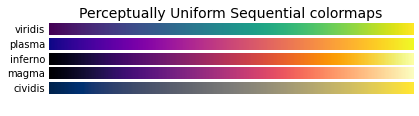

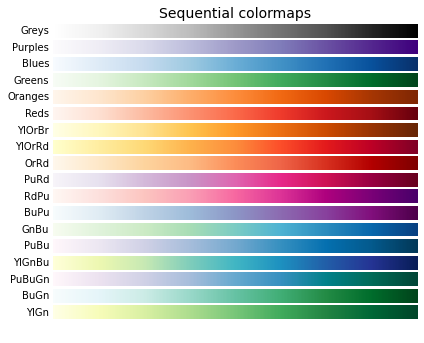

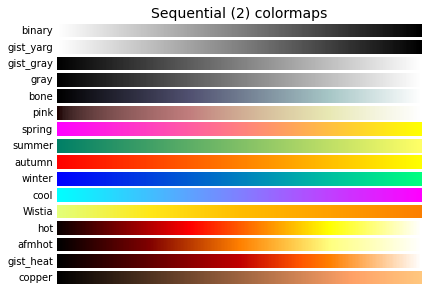

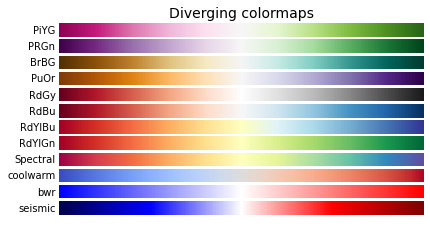

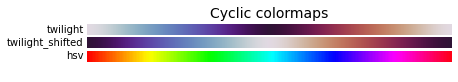

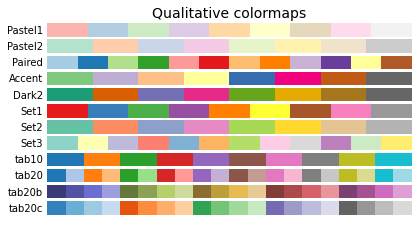

In [80]:
colors_getlist_id()

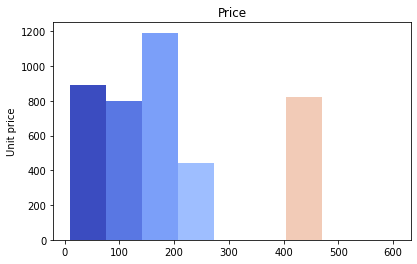

In [109]:
testhistogram(color_schema='coolwarm')

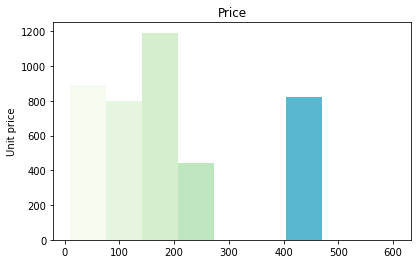

In [107]:
testhistogram(color_schema='GnBu')

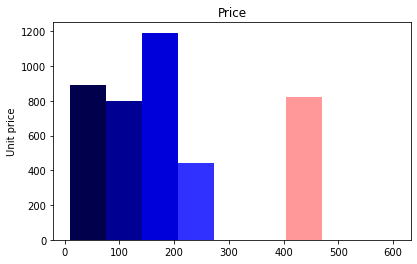

In [106]:
testhistogram(color_schema='seismic')

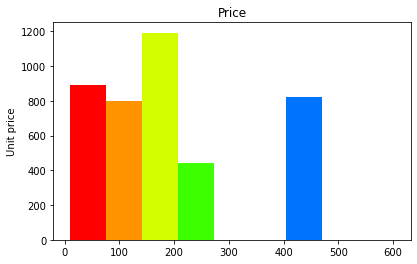

In [105]:
testhistogram(color_schema='hsv')

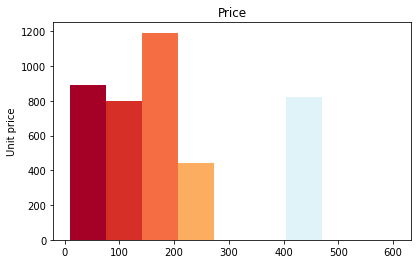

In [104]:
testhistogram()

In [103]:
def testhistogram(color_schema="RdYlBu"):
     # pip install box-python    can use .key or ["mykey"]  for dict
    data = test_getdata(verbose=False)
    df2  = data['sales.csv']
    from box import Box
    cfg = Box({})
    cfg.tseries = {"title": 'ok'}
    cfg.scatter = {"title" : "Titanic", 'figsize' : (12, 7)}
    cfg.histo   = {"title": 'ok'}

    doc = htmlDoc(dir_out="", title="hello", format='myxxxx', cfg=cfg)
    doc.plot_histogram(df2,col='Unit Price',color_schema=color_schema,cfg =  cfg.histo,title="Price",ylabel="Unit price", mode='matplot', save_img="")

    doc.save(dir_out="myfile.html")
    doc.open_browser()  # Open myfile.html

In [98]:
def pd_plot_histogram_matplot(df:pd.DataFrame, col: str='',color_schema:str='RdYlBu', title: str='', nbin=20.0, q5=0.005, q95=0.995, nsample=-1,
                              save_img: str="",xlabel: str=None,ylabel: str=None):
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.hist(df[config['x']].values,
    bins=config['bins'], color='red', alpha=0.5)
    ax.set_xlabel(config['x'])
    ax.set_ylabel(config['y'])
    ax.set_title(config['title'])
    ax.set_xlim(config['xlim'])
    ax.set_ylim(config['ylim'])
    return fig
    """

    cm = plt.cm.get_cmap(color_schema)
    
    dfi = df[col]
    q0  = dfi.quantile(q5)
    q1  = dfi.quantile(q95)
    fig = plt.figure()

    if nsample < 0:
        dfi.hist(bins=2)
        # dfi.hist(bins=np.arange(q0, q1,  (q1 - q0) / nbin))
    else:
        n, bins, patches = plt.hist(dfi, bins=np.arange(q0, q1,  (q1 - q0) / nbin))
        # dfi.sample(n=nsample, replace=True).hist( bins=np.arange(q0, q1,  (q1 - q0) / nbin))
    for i, p in enumerate(patches):
        plt.setp(p, 'facecolor', cm(i/nbin))  
    plt.title(title)
    plt.xlabel(xlabel) 
    plt.ylabel(ylabel)
    
    if len(save_img)>0 :
        os.makedirs(os.path.dirname(save_img), exist_ok=True)
        plt.savefig(save_img)
        print(save_img)

    # plt.close(fig)
    return fig


In [77]:
def colors_getlist_id():
  cmaps = {}
  cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']
  cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
  cmaps['Sequential (2)'] = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']
  cmaps['Diverging'] = [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']
  cmaps['Cyclic'] = ['twilight', 'twilight_shifted', 'hsv']
  cmaps['Qualitative'] = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']
  gradient = np.linspace(0, 1, 256)
  gradient = np.vstack((gradient, gradient))


  def plot_color_gradients(cmap_category, cmap_list):
      # Create figure and adjust figure height to number of colormaps
      nrows = len(cmap_list)
      figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
      fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
      fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                          left=0.2, right=0.99)
      axs[0].set_title(cmap_category + ' colormaps', fontsize=14)

      for ax, name in zip(axs, cmap_list):
          ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
          ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                  transform=ax.transAxes)

      # Turn off *all* ticks & spines, not just the ones with colormaps.
      for ax in axs:
          ax.set_axis_off()


  for cmap_category, cmap_list in cmaps.items():
      plot_color_gradients(cmap_category, cmap_list)

  plt.show()

In [3]:
#################################################################################################
def log(*s):
    print(*s, flush=True)

In [94]:
###################################################################################
#### Example usage ################################################################
def test_getdata(verbose=True):
    """
    data = test_get_data()
    df   = data['housing.csv']
    df.head(3)
    https://github.com/szrlee/Stock-Time-Series-Analysis/tree/master/data
    """
    import pandas as pd
    flist = [
        'https://raw.githubusercontent.com/samigamer1999/datasets/main/titanic.csv',
        'https://github.com/subhadipml/California-Housing-Price-Prediction/raw/master/housing.csv',
        'https://raw.githubusercontent.com/AlexAdvent/high_charts/main/data/stock_data.csv',
        'https://raw.githubusercontent.com/samigamer1999/datasets/main/cars.csv',
        'https://raw.githubusercontent.com/samigamer1999/datasets/main/sales.csv',
        'https://raw.githubusercontent.com/AlexAdvent/high_charts/main/data/weatherdata.csv'
    ]
    data = {}
    for url in flist :
       fname =  url.split("/")[-1]
      #  print( "\n", "\n", url, )
       df = pd.read_csv(url)
       data[fname] = df
       if verbose: print(df)
       # df.to_csv(fname , index=False)
    # print(data.keys() )
    return data


In [5]:
def test1():
    ####  Test Datatable
    doc = htmlDoc(dir_out="", title="hello", format='myxxxx', cfg={})

    # check add css
    css = """.intro {
        background-color: yellow;
    }
    """
    doc.add_css(css)

    # test create table
    df = test_getdata()['titanic.csv']
    doc.h1(" Table test ")
    doc.table(df, use_datatable=True, table_id="test", custom_css_class='intro')

    doc.print()
    doc.save(dir_out="testdata/test_viz_table.html")
    doc.open_browser()  # Open myfile.html



def test2():
    """
      # pip install --upgrade utilmy
      from util.viz import vizhtml as vi
      vi.test2()
    """
    data = test_getdata()

    doc = htmlDoc(title='Weather report', dir_out="", cfg={} )
    doc.h1(' Weather report')
    doc.hr() ; doc.br()

    # create time series chart. mode highcharts
    doc.h2('Plot of weather data') 
    doc.plot_tseries(data['weatherdata.csv'].iloc[:1000, :],
                      coldate     =  'Date',
                      date_format =  '%m/%d/%Y',
                      cols_axe1   =  ['Temperature'],
                      cols_axe2   =  ["Rainfall"],
                      # x_label=     'Date', 
                      # axe1_label=  "Temperature",
                      # axe2_label=  "Rainfall", 
                     title =      "Weather",
                     cfg={},             
                     mode='highcharts'
                     )

    doc.hr() ; doc.br()
    doc.h3('Weather data') 
    doc.table(data['weatherdata.csv'].iloc[:10 : ], use_datatable=True )


    # create histogram chart. mode highcharts
    doc.plot_histogram(data['housing.csv'].iloc[:1000, :], col="median_income",
                       xaxis_label= "x-axis",yaxis_label="y-axis",cfg={}, mode='highcharts', save_img=False)


     # Testing with example data sets (Titanic)
    cfg = {"title" : "Titanic", 'figsize' : (20, 7)}

    # create scatter chart. mode highcharts
    doc.plot_scatter(data['titanic.csv'].iloc[:50, :], colx='Age', coly='Fare',
                         collabel='Name', colclass1='Sex', colclass2='Age', colclass3='Sex',
                         figsize=(20,7),
                         cfg=cfg, mode='highcharts',                         
                         )

    doc.save('viz_test3_all_graphs.html')
    doc.open_browser()
    html1 = doc.get_html()
    # print(html1)
    # html_show(html1)


def test3(verbose=True):
    # pip install box-python    can use .key or ["mykey"]  for dict
    data = test_getdata()
    dft  = data['titanic.csv']
    df   = data['housing.csv']
    df2  = data['sales.csv']
    from box import Box
    cfg = Box({})
    cfg.tseries = {"title": 'ok'}
    cfg.scatter = {"title" : "Titanic", 'figsize' : (12, 7)}
    cfg.histo   = {"title": 'ok'}
    cfg.use_datatable = True

    df = pd.DataFrame([[1, 2]])
    df2_list = [df, df, df]
    print(df2_list)
    doc = htmlDoc(dir_out="", title="hello", format='myxxxx', cfg=cfg)

    doc.h1('My title')  # h1
    doc.sep()
    doc.br()  # <br>

    doc.tag('<h2> My graph title </h2>')
    doc.plot_scatter(dft, colx='Age', coly='Fare',
                     collabel='Name', colclass1='Sex', colclass2='Age', colclass3='Sex',
                     cfg=cfg.scatter, mode='matplot', save_img='')
    doc.hr()  # doc.sep() line separator

    # for df2_i in df2_list:
    #      print(df2_i)
    #      col2 =df2_i.columns
    #      # doc.h3(f" plot title: {df2_i['category'].values[0]}")
    #      doc.plot_tseries(df2_i, coldate= col2[0], cols_axe1= col2[1],   cfg = cfg.tseries, mode='highcharts')

    doc.tag('<h2> My histo title </h2>')
    doc.plot_histogram(df2,col='Unit Cost',mode='matplot', save_img="")
    doc.plot_histogram(df2,col='Unit Price',cfg =  cfg.histo,title="Price", mode='matplot', save_img="")

    doc.save(dir_out="myfile.html")
    doc.open_browser()  # Open myfile.html

In [6]:
def test_scatter_and_histogram_matplot():

  data = test_getdata()

  dft  = data['titanic.csv']
  df   = data['housing.csv']
  df2  = data['sales.csv']
  cfg = Box({})
  cfg.tseries = {"title": 'ok'}
  cfg.scatter = {"title" : "Titanic", 'figsize' : (12, 7)}
  cfg.histo   = {"title": 'ok'}
  cfg.use_datatable = True

  df = pd.DataFrame([[1, 2]])
  df2_list = [df, df, df]

  doc = htmlDoc(dir_out="", title="hello", format='myxxxx', cfg=cfg)
  doc.h1('My title')  # h1
  doc.sep()
  doc.br()  # <br>

  doc.tag('<h2> My graph title </h2>')
  doc.plot_scatter(dft, colx='Age', coly='Fare',
                    collabel='Name', colclass1='Sex', colclass2='Age', colclass3='Sex',
                    cfg=cfg.scatter, mode='matplot', save_img='')
  doc.hr()  # doc.sep() line separator


  doc.plot_histogram(df2,col='Unit Cost',mode='matplot', save_img="")

  doc.save(dir_out="myfile.html")
  doc.open_browser()  # Open myfile.html

In [7]:
def test_pd_plot_network():
  df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C'], 'weight':[1, 2, 1,5]})
  html_code = pd_plot_network(df, cola='from', colb='to', coledge='col_edge',colweight="weight")
  print(html_code)

In [8]:
def test_cssname(verbose=True,css_name="A4_size"):
    # pip install box-python    can use .key or ["mykey"]  for dict
    data = test_getdata()
    dft  = data['titanic.csv']
    df   = data['housing.csv']
    df2  = data['sales.csv']
    from box import Box
    cfg = Box({})
    cfg.tseries = {"title": 'ok'}
    cfg.scatter = {"title" : "Titanic", 'figsize' : (12, 7)}
    cfg.histo   = {"title": 'ok'}
    cfg.use_datatable = True

    df = pd.DataFrame([[1, 2]])
    df2_list = [df, df, df]
    print(df2_list)
    doc = htmlDoc(dir_out="", title="hello",css_name=css_name, format='myxxxx', cfg=cfg)

    doc.h1('My title')  # h1
    doc.sep()
    doc.br()  # <br>

    doc.tag('<h2> My graph title </h2>')
    doc.plot_scatter(dft, colx='Age', coly='Fare',
                     collabel='Name', colclass1='Sex', colclass2='Age', colclass3='Sex',
                     cfg=cfg.scatter, mode='matplot', save_img='')
    doc.hr()  # doc.sep() line separator



    # test create table
    df = test_getdata()['titanic.csv']
    doc.h1(" Table test ")
    doc.table(df[0:10], use_datatable=True, table_id="test", custom_css_class='intro')

    

    doc.tag('<h2> My histo title </h2>')
    doc.plot_histogram(df2,col='Unit Cost',mode='matplot', save_img="")
    doc.plot_histogram(df2,col='Unit Price',cfg =  cfg.histo,title="Price", mode='matplot', save_img="")

    doc.save(dir_out="myfile.html")
    doc.open_browser()  # Open myfile.html

In [9]:
def help():
    ss = "from utilmy.vi.vizhtml import * \n\n"
    ss = ss + "data = test_getdata() \n\n "
    ss = ss + help_get_codesource(test1) + "\n\n\n ##############################\n"
    ss = ss + help_get_codesource(test2) + "\n\n\n ##############################\n"
    ss = ss + help_get_codesource(test3) + "\n\n\n ##############################\n"
    ss = ss + help_get_codesource(test_scatter_and_histogram_matplot) + "\n\n\n ##############################\n"
    ss = ss + help_get_codesource(test_pd_plot_network) + "\n\n\n ##############################\n"
    ss = ss + help_get_codesource(test_cssname ) + "\n\n\n ##############################\n"

    ss = ss + "Template CSS: \n\n " + str( CSS_TEMPLATE.keys()  )
    
    print(ss)

In [97]:
#####################################################################################
#### HTML doc ########################################################################
class htmlDoc(object):
    def __init__(self, dir_out="", mode="", title: str="", format: str = None, cfg: dict =None,css_name:str="a4_size"):
        """
           Generate HTML page to display graph/Table.
           Combine pages together.
        """
        import mpld3
        self.fig_to_html = mpld3.fig_to_html
        cfg          = {} if cfg is None else cfg
        self.cc      = Box(cfg)  # Config dict
        self.dir_out = dir_out.replace("\\", "/")
        self.head    = f"  <html>\n    "
        self.html    = "\n </head> \n<body>"
        self.tail    = "\n </body>\n</html>"

        ##### HighCharts
        links = """<link href="https://www.highcharts.com/highslide/highslide.css" rel="stylesheet" />
              <script type="text/javascript" src="https://ajax.googleapis.com/ajax/libs/jquery/1.9.1/jquery.min.js"></script>
              <script type="text/javascript" src="https://code.highcharts.com/6/highcharts.js"></script>
              <script type="text/javascript" src="https://code.highcharts.com/6/highcharts-more.js"></script>
              <script type="text/javascript" src="https://code.highcharts.com/6/modules/heatmap.js"></script>
              <script type="text/javascript" src="https://code.highcharts.com/6/modules/histogram-bellcurve.js"></script>
              <script type="text/javascript" src="https://code.highcharts.com/6/modules/exporting.js"></script> 
              <link href="https://fonts.googleapis.com/css2?family=Arvo&display=swap" rel="stylesheet"> """
        
        self.head = self.head + """<head><title>{title}</title>
              {links}""".format(title=title,links=links)

        self.add_css(CSS_TEMPLATE.get(css_name, ''))
        # self.add_css(css_get_template(css_name=css_name))

        if css_name=="a4_size":
          self.html = self.html + '\n <page size="A4">'
          self.tail = "</page> \n" + self.tail

    def tag(self, x):  self.html += "\n" + x
    def h1(self,  x,css: str='')  : self.html += "\n" + f"<h1 style='{css}'>{x}</h1>"
    def h2(self,  x,css: str='')  : self.html += "\n" + f"<h2 style='{css}'>{x}</h2>"
    def h3(self,  x,css: str='')  : self.html += "\n" + f"<h3 style='{css}'>{x}</h3>"
    def h4(self,  x,css: str='')  : self.html += "\n" + f"<h4 style='{css}'>{x}</h4>"
    def p(self,   x,css: str='')  : self.html += "\n" + f"<p style='{css}'>{x}</p>"
    def div(self, x,css: str='')  : self.html += "\n" + f"<div style='{css}'>{x}</div>"
    def hr(self,    css: str='')  : self.html += "\n" + f"<hr style='{css}'/>"
    def sep(self,   css: str='')  : self.html += "\n" + f"<hr style='{css}'/>"
    def br(self,    css: str='')  : self.html += "\n" + f"<br style='{css}'/>"

    def get_html(self)-> str:
        full = self.head  + self.html + self.tail
        return full

    def print(self):
        full = self.head  + self.html + self.tail
        print(full, flush=True)

    def save(self, dir_out=None):
        self.dir_out = dir_out if dir_out is not None else self.dir_out
        self.dir_out = dir_out.replace("\\", "/")
        self.dir_out = os.getcwd() + "/" + self.dir_out if "/" not in self.dir_out[0] else self.dir_out
        os.makedirs( os.path.dirname(self.dir_out) , exist_ok = True )

        full = self.head + self.html + self.tail
        with open(self.dir_out, mode='w') as fp:
            fp.write(full)


    def open_browser(self):
        if os.name == 'nt':
            os.system(f'start chrome "file:///{self.dir_out}" ')
            ### file:///D:/_devs/Python01/gitdev/myutil/utilmy/viz/test_viz_table.html   

    def add_css(self, css):
        data = f"\n<style>\n{css}\n</style>\n"
        self.head += data
    
    def add_js(self,js):
        data = f"\n<script>\n{js}\n</script>\n"
        self.tail = data + self.tail

    def hidden(self, x,css: str=''):
        # Hidden P paragraph
        custom_id = str(random.randint(9999,999999))
        # self.head += "\n" + js_code.js_hidden  # Hidden  javascript
        self.html += "\n" + f"<div id='div{custom_id}' style='{css}'>{x}</div>"
        button = """<button id="{btn_id}">Toggle</button>""".format(btn_id="btn"+custom_id)
        self.html += "\n" + f"{button}"        
        js = """function toggle() {{
                if (document.getElementById("{div_id}").style.visibility === "visible") {{
                  document.getElementById("{div_id}").style.visibility = "hidden"
                }} else {{
                  document.getElementById("{div_id}").style.visibility = "visible"
                }}
              }}
              document.getElementById('{btn_id}').addEventListener('click', toggle);""".format(btn_id="btn"+custom_id,div_id="div"+custom_id)


        self.add_js(js)

    def table(self, df:pd.DataFrame, format: str='blue_light', custom_css_class=None, use_datatable=False, table_id=None, **kw):
        """ Show Pandas in HTML and interactive
        ## show table in HTML : https://pypi.org/project/pretty-html-table/
        Args:
            format:             List of colors available at https://pypi.org/project/pretty-html-table/
            custom_css_class:   [Option] Add custom class for table
            use_datatable:      [Option] Create html table as a database
            table_id:           [Option] Id for table tag
        """
        import pretty_html_table
        html_code = pretty_html_table.build_table(df, format)
        table_id  = random.randint(9999,999999) if table_id is None else table_id  #### Unique ID

        # add custom CSS class
        if custom_css_class:
            html_code = html_code.replace('<table', f'<table class="{custom_css_class}"')

        if use_datatable:
            # JS add datatables library
            self.head = self.head + """
            <link rel="stylesheet" type="text/css" href="https://cdn.datatables.net/v/dt/dt-1.10.25/datatables.min.css"/>
            <script src="https://ajax.googleapis.com/ajax/libs/jquery/3.1.0/jquery.min.js"></script>
            <script type="text/javascript" src="https://cdn.datatables.net/v/dt/dt-1.10.25/datatables.min.js"></script>"""
            # https://datatables.net/manual/installation
            # add $(document).ready( function () {    $('#table_id').DataTable(); } );

            # add data table
            html_code = html_code.replace('<table', f'<table id="{table_id}" ')
            html_code += """\n<script>$(document).ready( function () {    $('#{mytable_id}').DataTable({
                            "lengthMenu": [[10, 50, 100, 500, -1], [10, 50, 100, 500, "All"]]
                           }); 
                           });\n</script>\n
                         """.replace('{mytable_id}', str(table_id))
        self.html += "\n\n" + html_code


    def plot_tseries(self, df:pd.DataFrame, coldate, cols_axe1: list, cols_axe2=None,
                     title: str="", figsize: tuple=(14,7),  nsample: int= 10000,
                     x_label=None, axe1_label=None,  axe2_label=None,
                     date_format: str='%m/%d/%Y',
                     plot_type="",spacing=0.1,
                     cfg: dict = {}, mode: str='matplot', save_img="",  **kw):
        """Create html time series chart.
        Args:
            df:         pd Dataframe
            cols_axe1: list of column for axis 1
            cols_axe2: list of column for axis 2
            ...
            mode:       matplot or highcharts
        """
        html_code = ''
        if mode == 'matplot':
            fig       = pd_plot_tseries_matplot(df, coldate, cols_axe1=cols_axe1, cols_axe2=cols_axe2,
                                                   figsize=figsize, title=title,
                                                   x_label=x_label, axe1_label=axe1_label, axe2_label=axe2_label,
                                                   cfg=cfg, mode=mode, save_img=save_img,
                                                   spacing=spacing
                                                  )
            html_code = mpld3.fig_to_html(fig)

        elif mode == 'highcharts':
            html_code = pd_plot_tseries_highcharts(df, coldate, cols_axe1=cols_axe1, cols_axe2=cols_axe2,
                                                   date_format='%m/%d/%Y',
                                                   figsize=figsize, title=title,
                                                   x_label=x_label, axe1_label=axe1_label, axe2_label=axe2_label,
                                                   cfg=cfg, mode=mode, save_img=save_img,
                                                  )
        self.html += "\n\n" + html_code


    def plot_histogram(self, df:pd.DataFrame, col,
                       xlabel: str=None,ylabel: str=None,
                       title: str='', figsize: tuple=(14,7),
                       color_schema:str = 'RdYlBu', 
                       nsample=10000,nbin=10,
                       q5=0.005, q95=0.95,cfg: dict = {}, 
                       mode: str='matplot', save_img="",  **kw):
        """Create html histogram chart.
        Args:
            df:         pd Dataframe
            col:        x Axis
            ...
            mode:       matplot or highcharts
        """
        html_code = ''
        if mode == 'matplot':
            fig       = pd_plot_histogram_matplot(df, col,
                                                  title=title,
                                                  nbin=nbin, q5=q5, q95=q95,
                                                  xlabel= xlabel,ylabel=ylabel,color_schema=color_schema,
                                                  nsample=nsample, save_img=save_img)
            html_code = self.fig_to_html(fig)

        elif mode == 'highcharts':
            cfg['figsize'] = figsize
            html_code = pd_plot_histogram_highcharts(df,colname=col,
                                                     title=title,
                                                     cfg=cfg,mode=mode,save_img=save_img)
        self.html += "\n\n" + html_code



    def plot_scatter(self, df:pd.DataFrame, colx, coly,
                     title: str='', figsize: tuple=(14,7), nsample: int=10000,
                     collabel=None, colclass1=None, colclass2=None, colclass3=None,
                     cfg: dict = {}, mode: str='matplot', save_img='',  **kw):
        """Create html scatter chart.
        Args:
            df:         pd Dataframe
            colx:       x Axis
            coly:       y Axis
            ...
            mode:       matplot or highcharts
        """
        html_code = ''
        if mode == 'matplot':
            html_code = pd_plot_scatter_matplot(df, colx=colx, coly=coly,
                                                collabel=collabel, colclass1=colclass1, colclass2=colclass2,
                                                nsample=nsample,
                                                cfg=cfg, mode=mode, save_img=save_img,)

        elif mode == 'highcharts':
            html_code = pd_plot_scatter_highcharts(df, colx= colx, coly=coly,
                                                   colclass1=colclass1, colclass2=colclass2, colclass3=colclass3,
                                                   nsample=nsample,
                                                   cfg=cfg, mode=mode, save_img=save_img, verbose=False
                                                   )

        self.html += "\n\n" + html_code

      
    def images_dir(self, dir_input="*.png",  title: str="", 
                   verbose:bool =False):
      html_code = images_to_html(dir_input=dir_input,  title=title, verbose=verbose)
      self.html += "\n\n" + html_code


    def pd_plot_network(self, df:pd.DataFrame, cola: str='col_node1',
                        colb: str='col_node2', coledge: str='col_edge'):
        html_code = pd_plot_network(df, cola=cola, colb=colb, coledge=coledge)
        self.html += "\n\n" + html_code


In [11]:
##################################################################################################################
######### MLPD3 Display ##########################################################################################
mpld3_CSS = """
    text.mpld3-text, div.mpld3-tooltip {
      font-family:Arial, Helvetica, sans-serif;
    }
    g.mpld3-xaxis, g.mpld3-yaxis {
    display: none; }
"""


class mpld3_TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };
    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();
      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);
      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}


def mlpd3_add_tooltip(fig, points, labels):
    # set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(
        points[0], labels, voffset=10, hoffset=10, css=mpld3_CSS)
    # connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, mpld3_TopToolbar())

In [12]:
def pd_plot_scatter_get_data(df0:pd.DataFrame,colx: str=None, coly: str=None, collabel: str=None,
                            colclass1: str=None, colclass2: str=None, nmax: int=20000):
    # import copy
    nmax = min(nmax, len(df0))
    df   = df0.sample(nmax)

    colx      = 'x'      if colx is None else colx
    coly      = 'y'      if coly is None else coly
    collabel  = 'label'  if collabel is None else collabel    ### label per point
    colclass1 = 'class1' if colclass1 is None else colclass1  ### Color per point class1
    colclass2 = 'class2' if colclass2 is None else colclass2  ### Size per point class2

    #######################################################################################
    for ci in [ collabel, colclass1, colclass2 ] :
       if ci  not in df.columns : df[ci]  = ''
       df[ci]  = df[ci].fillna('')

    #######################################################################################
    xx = df[colx].values
    yy = df[coly].values

    # label_list = df[collabel].values
    label_list = ['{collabel} : {value}'.format(collabel=collabel,value =  df0[collabel][i]) for i in range(len(df0[collabel]))]

    ### Using Class 1 ---> Color
    color_scheme = [ 0,1,2,3]
    n_colors     = len(color_scheme)
    color_list   = [  color_scheme[ hash(str( x)) % n_colors ] for x in df[colclass1].values     ]


    ### Using Class 2  ---> Color
    n_size      = len(df[colclass2].unique())
    smin, smax  = 100.0, 200.0
    size_scheme = np.arange(smin, smax, (smax-smin)/n_size)
    n_colors    = len(size_scheme)
    size_list   = [  size_scheme[ hash(str( x)) % n_colors ] for x in df[colclass2].values     ]


    ###
    ptype_list = []

    return xx, yy, label_list, color_list, size_list, ptype_list

In [13]:
def pd_plot_scatter_matplot(df:pd.DataFrame, colx: str=None, coly: str=None, collabel: str=None,
                            colclass1: str=None, colclass2: str=None, cfg: dict = {}, mode='d3', save_path: str='',  **kw)-> str:
    
    cc           = Box(cfg)
    cc.figsize   = cc.get('figsize', (25, 15))  # Dict type default values
    cc.title     = cc.get('title', 'scatter title' )

    #######################################################################################
    xx, yy, label_list, color_list, size_list, ptype_list = pd_plot_scatter_get_data(df,colx, coly, collabel,
                                                            colclass1, colclass2)

    # set up plot
    fig, ax = plt.subplots(figsize= cc.figsize)  # set size
    ax.margins(0.05)  # Optional, just adds 5% padding to the autoscaling
    scatter = ax.scatter(xx,
                     yy,
                     c=color_list,
                     s=size_list,
                     alpha=1,
                     cmap=plt.cm.jet)
    ax.grid(color='white', linestyle='solid')
    # ax.scatter(xx, yy, s= size_list, label=label_list,
    #         c=color_list)
    ax.set_aspect('auto')
    ax.tick_params(axis='x',        # changes apply to the x-axis
                   which='both',    # both major and minor ticks are affected
                   bottom='off',    # ticks along the bottom edge are off
                   top='off',       # ticks along the top edge are off
                   labelbottom='off')
    ax.tick_params(axis='y',  # changes apply to the y-axis
                   which='both',  # both major and minor ticks are affected
                   left='off',  # ticks along the bottom edge are off
                   top='off',  # ticks along the top edge are off
                   labelleft='off')

    # ax.legend(numpoints=1)  # show legend with only 1 point
    # label_list = ['{0}'.format(d_small['Name'][i]) for i in range(N)]
    # add label in x,y position with the label
    # for i in range(N):
    #     ax.text(df['Age'][i], df['Fare'][i], label_list[i], size=8)
    
    if len(save_path) > 1 :
        plt.savefig(f'{cc.save_path}-{datetime.now().strftime("%Y-%m-%d %H-%M-%S")}.png', dpi=200)

    
    ax.set_aspect('auto')

    #  uncomment to hide tick
    # set tick marks as blank
    # ax.axes.get_xaxis().set_ticks([])
    # ax.axes.get_yaxis().set_ticks([])

    # set axis as blank
    # ax.axes.get_xaxis().set_visible(False)
    # ax.axes.get_yaxis().set_visible(False)
    
    # connect tooltip to fig
    tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=label_list, voffset=10, hoffset=10)
    mpld3.plugins.connect(fig, tooltip, mpld3_TopToolbar())
    # mlpd3_add_tooltip(fig, points, label_list)
    

    # ax.legend(numpoints=1)  # show legend with only one dot
    # mpld3.save_html(fig,  f"okembeds.html")
    # return fig
    ##### Export ############################################################
    html_code = mpld3.fig_to_html(fig)
    # print(html_code)
    return html_code

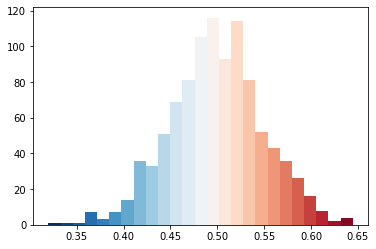

In [14]:
import matplotlib.pyplot as plt

Ntotal = 1000
data = 0.05 * np.random.randn(Ntotal) + 0.5

cm = plt.cm.RdBu_r

n, bins, patches = plt.hist(data, 25, color='black')
for i, p in enumerate(patches):
    plt.setp(p, 'facecolor', cm(i/25)) # notice the i/25

plt.show()

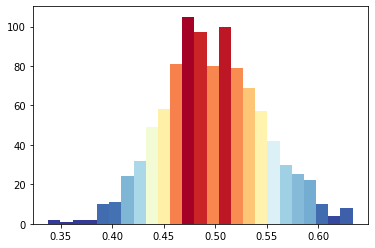

In [15]:
import numpy as np
import matplotlib.pyplot as plt

Ntotal = 1000
data = 0.05 * np.random.randn(Ntotal) + 0.5
cm = plt.cm.get_cmap('RdYlBu_r')

n, bins, patches = plt.hist(data, 25, color='green')
# To normalize your values
col = (n-n.min())/(n.max()-n.min())
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
plt.show()

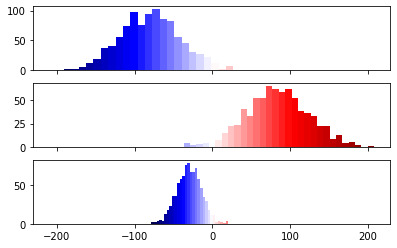

In [16]:
import numpy as np; np.random.seed(42)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 6.4,4

def randn(n, sigma, mu):
    return sigma * np.random.randn(n) + mu

x1 = randn(999, 40., -80)
x2 = randn(750, 40., 80)
x3 = randn(888, 16., -30)


def hist(x, ax=None):
    cm = plt.cm.get_cmap("seismic")
    ax = ax or plt.gca()
    _, bins, patches = ax.hist(x,color="r",bins=30)

    bin_centers = 0.5*(bins[:-1]+bins[1:])
    maxi = np.abs(bin_centers).max()
    norm = plt.Normalize(-maxi,maxi)

    for c, p in zip(bin_centers, patches):
        plt.setp(p, "facecolor", cm(norm(c)))


fig, axes = plt.subplots(nrows=3, sharex=True)

for x, ax in zip([x1,x2,x3], axes):
    hist(x,ax=ax)

plt.show()

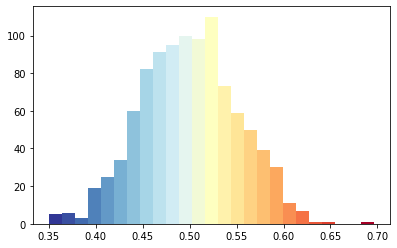

In [17]:
import numpy as n
import matplotlib.pyplot as plt

# Random gaussian data.
Ntotal = 1000
data = 0.05 * n.random.randn(Ntotal) + 0.5

# This is  the colormap I'd like to use.
cm = plt.cm.get_cmap('RdYlBu_r')

# Plot histogram.
n, bins, patches = plt.hist(data, 25, color='green')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

plt.show()


 
 https://raw.githubusercontent.com/samigamer1999/datasets/main/titanic.csv
     Survived  Pclass  ... Parents/Children Aboard     Fare
0           0       3  ...                       0   7.2500
1           1       1  ...                       0  71.2833
2           1       3  ...                       0   7.9250
3           1       1  ...                       0  53.1000
4           0       3  ...                       0   8.0500
..        ...     ...  ...                     ...      ...
882         0       2  ...                       0  13.0000
883         1       1  ...                       0  30.0000
884         0       3  ...                       2  23.4500
885         1       1  ...                       0  30.0000
886         0       3  ...                       0   7.7500

[887 rows x 8 columns]

 
 https://github.com/subhadipml/California-Housing-Price-Prediction/raw/master/housing.csv
       longitude  latitude  ...  ocean_proximity  median_house_value
0        -122.23

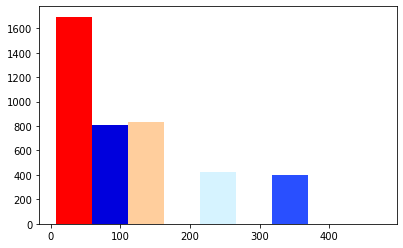

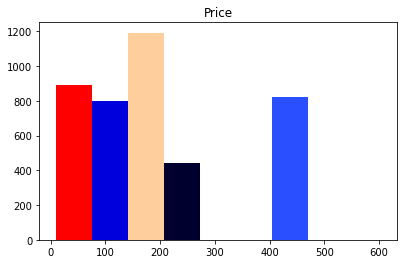

In [59]:
testhistogram()

In [46]:
import matplotlib

In [21]:
def pd_plot_tseries_matplot(df:pd.DataFrame, plot_type: str=None, cols_axe1: list = [], cols_axe2: list = [],
                            figsize: tuple =(8, 4), spacing=0.1, **kw):
    """
    """
    from pandas import plotting
    from pandas.plotting import _matplotlib
    from matplotlib import pyplot as plt

    plt.figure(figsize=figsize)
    # Get default color style from pandas - can be changed to any other color list
    if cols_axe1 is None:
        cols_axe1 = df.columns
    if len(cols_axe1) == 0:
        return
    colors = getattr(getattr(plotting, '_matplotlib').style, '_get_standard_colors')(
        num_colors=len(cols_axe1 + cols_axe2))

    # Displays subplot's pair in case of plot_type defined as `pair`
    if plot_type == 'pair':
        ax = df.plot(subplots=True, figsize=figsize, **kw)
        # plt.show()
        html_code = mpld3.fig_to_html(ax,  **kw)
        return html_code

    # First axis
    ax = df.loc[:, cols_axe1[0]].plot(
        label=cols_axe1[0], color=colors[0], **kw)
    ax.set_ylabel(ylabel=cols_axe1[0])
    ##  lines, labels = ax.get_legend_handles_labels()
    lines, labels = [], []

    i1 = len(cols_axe1)
    for n in range(1, len(cols_axe1)):
        df.loc[:, cols_axe1[n]].plot(
            ax=ax, label=cols_axe1[n], color=colors[(n) % len(colors)], **kw)
        line, label = ax.get_legend_handles_labels()
        lines += line
        labels += label

    for n in range(0, len(cols_axe2)):
        # Multiple y-axes
        ax_new = ax.twinx()
        ax_new.spines['right'].set_position(('axes', 1 + spacing * (n - 1)))
        df.loc[:, cols_axe2[n]].plot(
            ax=ax_new, label=cols_axe2[n], color=colors[(i1 + n) % len(colors)], **kw)
        ax_new.set_ylabel(ylabel=cols_axe2[n])

        # Proper legend position
        line, label = ax_new.get_legend_handles_labels()
        lines += line
        labels += label

    ax.legend(lines, labels, loc=0)
    #plt.show()
    return ax
    # html_code = mpld3.fig_to_html(ax,  **kw)
    # return html_code

In [22]:
def mpld3_server_start():
    # Windows specifc
    # if os.name == 'nt': os.system(f'start chrome "{dir_out}/embeds.html" ')
    # mpld3.show(fig=None, ip='127.0.0.1', port=8888, n_retries=50, local=True, open_browser=True, http_server=None, **kwargs)[source]
    mpld3.show()  # show the plot

In [23]:
############################################################################################################################
############################################################################################################################
highcharts_doc ="""
https://www.highcharts.com/docs/getting-started/how-to-set-options
"""


def pd_plot_highcharts(df):
    """
    # Basic line plot
   chart = serialize(df, render_to="my-chart", title="My Chart")
   # Basic column plot
   chart = serialize(df, render_to="my-chart", title="Test", kind="bar")
   # Plot C on secondary axis
   chart = serialize(df, render_to="my-chart", title="Test", secondary_y = ["C"])
   # Plot on a 1000x700 div
   chart = serialize(df, render_to="my-chart", title="Test", figsize = (1000, 700))
    """
    import pandas_highcharts
    data = pandas_highcharts.serialize(
        df, render_to='my-chart', output_type='json')
    json_data_2 = "new Highcharts.StockChart(%s);" % pandas_highcharts.core.json_encode(
        data)

    html_code = """<div id="{chart_id}"</div>
      <script type="text/javascript">{data}</script>""".format(chart_id="new_brownian", data=json_data_2)
    return html_code

In [24]:
def pd_plot_scatter_highcharts(df0:pd.DataFrame, colx:str=None, coly:str=None, collabel: str=None,
                               colclass1: str=None, colclass2: str=None, colclass3: str=None, nsample=10000,
                               cfg:dict={}, mode='d3', save_img='', verbose=True, **kw)-> str:
    """ Plot Highcharts X=Y Scatter
    from utilmy.viz import vizhtml
    vizhtml.pd_plot_scatter_highcharts(df, colx:str=None, coly:str=None, collabel=None,
                               colclass1=None, colclass2=None, colclass3=None, nsample=10000,
                               cfg:dict={}, mode='d3', save_img=False,  verbose=True )
    """
    import matplotlib
    from box import Box
    from highcharts import Highchart

    cc = Box(cfg)
    cc.title      = cc.get('title',    'my scatter')
    cc.figsize    = cc.get('figsize', (640, 480) )   ### Dict type default values
    cc.colormap   = cc.get('colormap', 'brg')
    if verbose: print(cc['title'], cc['figsize'])

    nsample = min(nsample, len(df0))
    df   = df0.sample(nsample)

    colx      = 'x'      if colx is None else colx
    coly      = 'y'      if coly is None else coly
    collabel  = 'label'  if collabel is None else collabel    ### label per point
    colclass1 = 'class1' if colclass1 is None else colclass1  ### Color per point class1
    colclass2 = 'class2' if colclass2 is None else colclass2  ### Size per point class2
    colclass3 = 'class3' if colclass3 is None else colclass3  ### Marker per point


    #######################################################################################
    for ci in [ collabel, colclass1, colclass2 ] :
       if ci  not in df.columns : df[ci]  = ''  ### add missing
       df[ci]  = df[ci].fillna('')

    xx         = df[colx].values
    yy         = df[coly].values
    label_list = df[collabel].values

    ### Using Class 1 ---> Color
    color_list    = [ hash(str(x)) for x in df[colclass1].values     ]
    # Normalize the classes value over [0.0, 1.0]
    norm          = matplotlib.colors.Normalize(vmin=min(color_list), vmax=max(color_list))
    c_map         = plt.cm.get_cmap(cc.colormap)
    color_list    = [  matplotlib.colors.rgb2hex(c_map(norm(x))).upper() for x in color_list    ]


    ### Using Class 2  ---> Color
    n_size      = len(df[colclass2].unique())
    smin, smax  = 1.0, 15.0
    size_scheme = np.arange(smin, smax, (smax-smin)/n_size)
    n_colors    = len(size_scheme)
    size_list   = [  size_scheme[ hash(str( x)) % n_colors ] for x in df[colclass2].values     ]


    # Create chart object
    container_id = 'cid_' + str(np.random.randint(9999, 99999999))
    chart        = Highchart(renderTo=container_id)
    options      = { 'chart': {
            'width': cc.figsize[0],
            'height': cc.figsize[1]
        },   'title': {
        'text': cc.title
    },
    'xAxis': {
        'title': {
            'text': colx
        }
    },
    'yAxis': {
        'title': {
            'text': coly
        }
    },
    'legend': {
        'enabled': False
    },'tooltip': {
        'pointFormat': '{point.label}'
    }}

    chart.set_dict_options(options)

    # Plot each cluster with the correct size and color
    data = [{
        'x'     : float(xx[i]),
        'y'     : float(yy[i]),
        "label" : str(label_list[i]),
        "marker": { 'radius' : int(size_list[i]) },
        'color' : color_list[i]
        } for i in range(len(df))
    ]

    chart.add_data_set(data, 'scatter')
    chart.buildcontent()
    html_code = chart._htmlcontent.decode('utf-8')
    return html_code

In [25]:
def pd_plot_tseries_highcharts(df,
                              coldate:str=None, date_format:str='%m/%d/%Y',
                              cols_axe1:list =[],     cols_axe2:list =[],
                              figsize:tuple =  None, title:str=None,
                              x_label:str=None,  axe1_label:str=None, axe2_label:str=None,
                              cfg:dict={}, mode='d3', save_img="")-> str:
    '''
        function to return highchart json cord for time_series.
        input parameter
        df : panda dataframe on which you want to apply time_series
        cols_axe1: column name for y-axis one
        cols_axe2: column name for y-axis second
        x_label : label of x-axis
        cols_axe1_label : label for yaxis 1
        cols_axe2_label : label for yaxis 2
        date_format : %m for moth , %d for day and %Y for Year.
    '''

    from highcharts import Highchart
    from box import Box
    cc = Box(cfg)
    cc.coldate      = 'date'  if coldate is None else coldate
    cc.x_label      = coldate if x_label is None else x_label
    cc.axe1_label   = "_".join(cols_axe1)      if axe1_label is None else axe1_label
    cc.axe2_label   = "_".join(cols_axe2)      if axe2_label is None else axe2_label
    cc.title        = cc.get('title',    str(axe1_label) + " vs " + str(coldate) ) if title is None else title
    cc.figsize      = cc.get('figsize', (25, 15) )    if figsize is None else figsize
    cc.subtitle     = cc.get('subtitle', '')
    cc.cols_axe1    = cols_axe1
    cc.cols_axe2    = cols_axe2
    df[cc.coldate]     = pd.to_datetime(df[cc.coldate],format=date_format)

    #########################################################
    container_id = 'cid_' + str(np.random.randint(9999, 99999999))
    H = Highchart(renderTo=container_id)
    options = {
      'chart':   { 'zoomType': 'xy'},
        'title': { 'text': cc.title},
        'subtitle': {  'text': cc.subtitle },
        'xAxis': [{
                      'type': 'datetime',
                      'title': { 'text': cc.x_label }
                  }],
        'yAxis': [{
            'labels': {
                'style': {  'color': 'Highcharts.getOptions().colors[2]' }
            },
            'title': {
                'text': cc.axe2_label,
                'style': {   'color': 'Highcharts.getOptions().colors[2]' }
            },
            'opposite': True

        }, {
            'gridLineWidth': 0,
            'title': {
                'text': cc.axe1_label,
                'style': { 'color': 'Highcharts.getOptions().colors[0]'
                }
            },
            'labels': {
                'style': { 'color': 'Highcharts.getOptions().colors[0]'
                }
            }

        }],

        'tooltip': { 'shared': True,    },
        'legend': {
            'layout': 'vertical',
            'align': 'left',
            'x': 80,
            'verticalAlign': 'top',
            'y': 55,
            'floating': True,
            'backgroundColor': "(Highcharts.theme && Highcharts.theme.legendBackgroundColor) || '#FFFFFF'"
        },
    }
    H.set_dict_options(options)

    for col_name in cc.cols_axe1:
      data = [[df[cc.coldate][i] , float(df[col_name][i]) ] for i in range(df.shape[0])]
      H.add_data_set(data, 'spline', col_name,yAxis=1)

    for col_name in cc.cols_axe2:
      data = [[df[cc.coldate][i] , float(df[col_name][i])] for i in range(df.shape[0])]
      H.add_data_set(data, 'spline', col_name, yAxis=0, )

    ##################################################################
    H.buildcontent()
    html_code = H._htmlcontent.decode('utf-8')
    return html_code

In [26]:
def pd_plot_histogram_highcharts(df:pd.DataFrame, colname:str=None,
                              binsNumber=None, binWidth=None,
                              title:str="", xaxis_label:str= "x-axis", yaxis_label:str="y-axis",
                              cfg:dict={}, mode='d3', save_img="",
                              show=False):

    ''' function to return highchart json code for histogram.
        input parameter
        df : panda dataframe on which you want to apply histogram
        colname : column name from dataframe in which histogram will apply
        xaxis_label: label for x-axis
        yaxis_label: label for y-axis
        binsNumber: Number of bin in bistogram.
        binWidth : width of each bin in histogram
        title : title of histogram
        cols_axe2_label : label for yaxis 2
        date_format : %m for moth , %d for day and %Y for Year.
        df        = data['housing.csv']
        html_code = pd_plot_histogram_hcharts(df,colname="median_income",xaxis_label= "x-axis",yaxis_label="y-axis",cfg={}, mode='d3', save_img=False)
        # highcharts_show_chart(html_code)
    '''
    cc = Box(cfg)
    cc.title        = cc.get('title',    "My Title" ) if title is None else title
    cc.xaxis_label  = xaxis_label
    cc.yaxis_label  = yaxis_label

    container_id = 'cid_' + str(np.random.randint(9999, 99999999))
    data         = df[colname].values.tolist()

    code_html_start = f"""
         <script src="https://code.highcharts.com/6/modules/histogram-bellcurve.js"></script>
             <div id="{container_id}">Loading</div>
         <script>
    """

    data_code = """
     var data = {data}
     """.format(data = data)

    title  = """{ text:'""" + cc.title +"""' }"""

    xAxis = """[{
                title: { text:'""" + cc.xaxis_label + """'},
                alignTicks: false,
                opposite: false
            }]"""

    yAxis = """[{
                title: { text:'""" + cc.yaxis_label + """'},
                opposite: false
            }] """

    append_series1 = """[{
            name: 'Histogram',
            type: 'histogram',
            baseSeries: 's1',"""

    if binsNumber is not None:
      append_series1 += """ binsNumber:{binsNumber},  """.format(binsNumber = binsNumber)

    if binWidth is not None:
      append_series1 += """ binWidth:{binWidth},""".format(binWidth = binWidth)

    append_series2 =  """}, {
            name: ' ',
            type: 'scatter',
            data: data,
            visible:false,
            id: 's1',
            marker: {  radius: 0}
        }] """

    append_series = append_series1 + append_series2

    js_code = """Highcharts.chart('"""+container_id+"""', {
        title:""" +  title+""",
        xAxis:""" +  xAxis+""",
        yAxis:""" +  yAxis+""",
        series: """+append_series+"""
    });
    </script>"""

    html_code = data_code + js_code

    # if show :
    html_code = code_html_start + html_code

    # print(html_code)
    return html_code

In [27]:
def html_show_chart_highchart(html_code, verbose=True):
    # Function to display highcharts graph
    from highcharts import Highchart
    from IPython.core.display import display, HTML
    hc = Highchart()
    hc.buildhtmlheader()
    html_code = hc.htmlheader + html_code
    if verbose: print(html_code)
    display(HTML(html_code))

In [28]:
def html_show(html_code, verbose=True):
    # Function to display HTML
    from IPython.core.display import display, HTML
    display(HTML( html_code))

In [29]:
############################################################################################################################
############################################################################################################################
def images_to_html(dir_input="*.png",  title="", verbose=False):
    """
        images_to_html( model_path + "/graph_shop_17_past/*.png" , model_path + "shop_17.html" )
    """
    import matplotlib.pyplot as plt
    import base64
    from io import BytesIO
    import glob
    html = ""
    flist = glob.glob(dir_input)
    flist.sorted()
    for fp in flist:
        if verbose:
            print(fp, end=",")
        with open(fp, mode="rb") as fp2:
            tmpfile = fp2.read()
        encoded = base64.b64encode(tmpfile) .decode('utf-8')
        html = html + \
            f'<p><img src=\'data:image/png;base64,{encoded}\'> </p>\n'

    return html

In [30]:
############################################################################################################################
############################################################################################################################
def pd_plot_network(df:pd.DataFrame, cola: str='col_node1', 
                    colb: str='col_node2', coledge: str='col_edge',
                    colweight: str="weight",html_code:bool = True):
    """
        https://pyviz.org/tools.html
    """

    def convert_to_networkx(df:pd.DataFrame, cola: str="", colb: str="", colweight: str=None):
        """
           Convert a panadas dataframe into a networkx graph
           and return a networkx graph
        Args:
            df ([type]): [description]
        """
        import networkx as nx
        import pandas as pd
        g = nx.Graph()
        for index, row in df.iterrows():
            g.add_edge(row[cola], row[colb], weight=row[colweight],)

        nx.draw(g, with_labels=True)
        return g


    def draw_graph(networkx_graph, notebook:bool =False, output_filename='graph.html',
                   show_buttons:bool =True, only_physics_buttons:bool =False,html_code:bool  = True):
        """
        This function accepts a networkx graph object, converts it to a pyvis network object preserving
        its node and edge attributes,
        and both returns and saves a dynamic network visualization.
        Valid node attributes include:
            "size", "value", "title", "x", "y", "label", "color".
            (For more info: https://pyvis.readthedocs.io/en/latest/documentation.html#pyvis.network.Network.add_node)
        Args:
            networkx_graph: The graph to convert and display
            notebook: Display in Jupyter?
            output_filename: Where to save the converted network
            show_buttons: Show buttons in saved version of network?
            only_physics_buttons: Show only buttons controlling physics of network?
        """
        from pyvis import network as net
        import re
        # make a pyvis network
        pyvis_graph = net.Network(notebook=notebook)

        # for each node and its attributes in the networkx graph
        for node, node_attrs in networkx_graph.nodes(data=True):
            pyvis_graph.add_node(str(node), **node_attrs)

        # for each edge and its attributes in the networkx graph
        for source, target, edge_attrs in networkx_graph.edges(data=True):
            # if value/width not specified directly, and weight is specified, set 'value' to 'weight'
            if not 'value' in edge_attrs and not 'width' in edge_attrs and 'weight' in edge_attrs:
                # place at key 'value' the weight of the edge
                edge_attrs['value'] = edge_attrs['weight']
            # add the edge
            pyvis_graph.add_edge(str(source), str(target), **edge_attrs)

        # turn buttons on
        if show_buttons:
            if only_physics_buttons:
                pyvis_graph.show_buttons(filter_=['physics'])
            else:
                pyvis_graph.show_buttons()

        # return and also save
        pyvis_graph.show(output_filename)
        if html_code:

          def extract_text(tag: str,content: str)-> str:
            reg_str = "<" + tag + ">\s*((?:.|\n)*?)</" + tag + ">"
            extracted = re.findall(reg_str, content)[0]
            return extracted
          with open(output_filename) as f:
            content = f.read()
            head = extract_text('head',content)
            body = extract_text('head',content)
            return head + "\n" + body
    networkx_graph = convert_to_networkx(df, cola, colb, colweight=colweight)
    ng2 = draw_graph(networkx_graph, notebook=False, output_filename='graph.html',
               show_buttons=True, only_physics_buttons=False,html_code = True)
    return ng2

In [31]:
###################################################################################################
########CSS Teamplates ############################################################################
CSS_TEMPLATE = Box({})
CSS_TEMPLATE.base_grey = """
        .body {
          font: 90%/1.45em "Helvetica Neue", HelveticaNeue, Verdana, Arial, Helvetica, sans-serif;
          margin: 0;
          padding: 0;
          color: #333;
          background-color: #fff;
        }
"""

CSS_TEMPLATE.base = """
              body{margin:25px;font-family: 'Open Sans', sans-serif;}
              h1,h2,h3,h4,h5,h6{margin-bottom: 0.5rem;font-family: 'Arvo', serif;line-height: 1.5;color: #32325d;}
              .dataTables_wrapper{overflow-x: auto;}
              hr{border-top: dotted 4px rgba(26, 47, 51, 0.7);opacity:0.3 ;}
              div{margin-top: 5px;margin-bottom: 5px;}
              table {border-collapse: collapse;}
              table th,table td {border: 1px solid lightgrey;}         
"""


CSS_TEMPLATE.a4_page = CSS_TEMPLATE.base + """
            body {background: rgb(204,204,204); }
            page {
              background: white;display: block;padding:15px;margin: 0 auto;margin-bottom: 0.5cm;
              box-shadow: 0 0 0.5cm rgba(0,0,0,0.5);
            }
            page[size="A4"] {width: 21cm; }
            @media print {body, page {margin: 0;box-shadow: 0;}}
"""


CSS_TEMPLATE.border = CSS_TEMPLATE.base + """
            .highcharts-container {border: 3px dotted grey;}
            .mpld3-figure {border: 3px dotted grey;}
"""


CSS_TEMPLATE.a3d = CSS_TEMPLATE.base + """
            div {
            background: white;display: block;margin: 0 auto;
            margin-bottom: 0.5cm;box-shadow: 0 0 0.5cm rgba(0,0,0,0.5);}
            h1,h2,h3,h4,h5,h6 {box-shadow: 0 0 0.5cm rgba(0,0,0,0.5);
            padding: 5px;} 
"""









###################################################################################################
######### JScript #################################################################################
js_code = Box({})  # List of javascript code
js_code.js_hidden = """<script>
var x = document.getElementById('hidden_section_id');
x.onclick = function() {
    if (x.style.display == 'none') {
        x.style.display = 'block';
    } else {
        x.style.display = 'none';
    }
}
</script>
"""




###################################################################################################
###################################################################################################
def help_get_codesource(func):
    """ Using the magic method __doc__, we KNOW the size of the docstring.
        We then, just substract this from the total length of the function
    """
    import inspect
    try:
        lines_to_skip = len(func.__doc__.split('\n'))
    except AttributeError:
        lines_to_skip = 0
    lines = inspect.getsourcelines(func)[0]
    return ''.join( lines[lines_to_skip+1:] )





###################################################################################################
if __name__ == "__main__":
    import fire
    fire.Fire()
    # test2()









def zz_css_get_template(css_name:str= "A4_size"):
    css_code = """
              body{margin:25px;font-family: 'Open Sans', sans-serif;}
              h1,h2,h3,h4,h5,h6{margin-bottom: 0.5rem;font-family: 'Arvo', serif;line-height: 1.5;color: #32325d;}
              .dataTables_wrapper{overflow-x: auto;}
              hr{border-top: dotted 4px rgba(26, 47, 51, 0.7);opacity:0.3 ;}
              div{margin-top: 5px;margin-bottom: 5px;}
              table {border-collapse: collapse;}
              table th,table td {border: 1px solid lightgrey;}         
    """
    if css_name == "A4_size":
          css_code = css_code + """
            body {background: rgb(204,204,204); }
            page {
              background: white;display: block;padding:15px;margin: 0 auto;margin-bottom: 0.5cm;
              box-shadow: 0 0 0.5cm rgba(0,0,0,0.5);
            }
            page[size="A4"] {width: 21cm; }
            @media print {body, page {margin: 0;box-shadow: 0;}}
        """
    if css_name == "border":
          css_code = css_code + """
            .highcharts-container {border: 3px dotted grey;}
            .mpld3-figure {border: 3px dotted grey;}
        """
    if css_name == "3d":
          css_code = css_code + """
            div {
            background: white;display: block;margin: 0 auto;
            margin-bottom: 0.5cm;box-shadow: 0 0 0.5cm rgba(0,0,0,0.5);}
          h1,h2,h3,h4,h5,h6 {box-shadow: 0 0 0.5cm rgba(0,0,0,0.5);
            padding: 5px;} 
        """
    return css_code








def zz_test_get_random_data(n=100):
    ### return  random data
    df = {'date' :pd.date_range("1/1/2018", "1/1/2020")[:n] }
    df = pd.DataFrame(df)
    df['col1'] = np.random.choice( a=[0, 1, 2],  size=len(df),    p=[0.5, 0.3, 0.2]   )
    df['col2'] = np.random.choice( a=['a0', 'a1', 'a2'],  size=len(df),    p=[0.5, 0.3, 0.2]   )
    for ci in ['col3', 'col4', 'col5'] :
        df[ci] = np.random.random(len(df))
    return df





def zz_pd_plot_histogram_highcharts_old(df, col, figsize=None,
                                 title=None,
                                 cfg:dict={}, mode='d3', save_img=''):
    from box import Box
    cc = Box(cfg)
    cc.title        = cc.get('title',    'Histogram' + col ) if title is None else title
    cc.figsize      = cc.get('figsize', (25, 15) )    if figsize is None else figsize
    cc.subtitle     = cc.get('subtitle', '')
    x_label         = col+'-bins'
    y_label         = col+'-frequency'

    #### Get data, calculate histogram and bar centers
    hist, bin_edges = np.histogram( df[col].values )
    bin_centers     = [float(bin_edges[i+1] + bin_edges[i]) / 2 for i in range(len(hist))]
    hist_val        = hist.tolist()

    #### Plot
    pd_plot_histogram_highcharts_base(bins    = bin_centers,
                                      vals    = hist_val,
                                      figsize = figsize,
                                      title   = title,
                                      x_label = x_label, y_label=y_label, cfg=cfg, mode=mode, save_img=save_img)


"""
https://pyviz.org/tools.html
        Name		Stars	Contributors	Downloads		License	Docs	PyPI	Conda	Sponsors
        networkx										-
        graphviz										-
        pydot							-			-
        pygraphviz										-
        python-igraph										-
        pyvis										-
        pygsp										-
        graph-tool				-		-		-		-
        nxviz										-
        Py3Plex					-				-	-
        py2cytoscape										-
        ipydagred3							-			-
        ipycytoscape							-			-
        webweb										-
        netwulf					-				-	-
        ipysigma					-		-		-
        
        
        
        
"""

ERROR: Cannot find key: -f
Usage: ipykernel_launcher.py <group|command|value>
  available groups:      In | Out | exit | quit | os | sys | random | np | pd |
                         fire | List | plt | mpld3 | cm
  available commands:    get_ipython | datetime | tqdm | Box | log |
                         test_getdata | test1 | test2 | test3 |
                         test_scatter_and_histogram_matplot |
                         test_pd_plot_network | test_cssname | help | htmlDoc |
                         mpld3_TopToolbar | mlpd3_add_tooltip |
                         pd_plot_scatter_get_data | pd_plot_scatter_matplot |
                         randn | hist | testhistogram |
                         pd_plot_histogram_matplot | pd_plot_tseries_matplot |
                         mpld3_server_start | pd_plot_highcharts |
                         pd_plot_scatter_highcharts |
                         pd_plot_tseries_highcharts |
                         pd_plot_histogram_highcharts |
   

FireExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
